<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Предоброботка-текстовых-данных" data-toc-modified-id="Предоброботка-текстовых-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предоброботка текстовых данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
conda install -c conda-forge lightgbm -q

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install phik -q
!pip install nltk -q 
!pip install transformers -q
!pip install tqdm -q 
!pip install lightgbm -q
!pip install statsmodels -q

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
#Загружаем библтотеки
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import transformers 
import statsmodels.api as sm
import sklearn
from tqdm import notebook
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer 
#from pymystem3 import Mystem
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import f1_score,classification_report
from sklearn.pipeline import Pipeline
from phik.report import plot_correlation_matrix
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))
RANDOM_STATE = 42
TEST_SIZE = 0.2
plt.rcParams["figure.figsize"] = (8,8)
#pd.set_option('display.max_rows', None)
#pd.options.display.max_colwidth = 500
import warnings
warnings.filterwarnings("ignore")

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bugagashechka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Загружаем данные
pth1 = r'/datasets/toxic_comments.csv'
pth2 = r'/Users/bugagashechka/Downloads/toxic_comments.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1,index_col='Unnamed: 0')
elif os.path.exists(pth2):
    data_one = pd.read_csv(pth2,index_col='Unnamed: 0')
else:
    print('Something is wrong')

In [11]:
#Изучаем загруженные файлы
display(data_one.sample(10))
print()
display(data_one.info())
print()
display(data_one.duplicated().sum())
print()
display(data_one.describe())
print()

,text,toxic
133088,:Phoenix Card\nA tag has been placed on Phoeni...,0
53005,"You know I think it is, she is after all Calif...",0
147383,Additions of http://.MusaliaMudavadi.com \nPl...,0
52760,"""\n\nOjai Valley\nI removed the following:\nNo...",0
141113,Under personal life... \n\nI would add that Al...,0
75642,As the only reasonable mod I've run into aroun...,0
77268,Moe Salem user askandrany 1 \nPlease could yo...,0
49160,"""\n\n My Z! ) \n\nHow are you doing, my dear Z...",0
145163,"""\n\nMany people my self included abstained fr...",0
36768,"""\n\nWhy do you think that animal liberation m...",0



<class 'pandas.core.frame.DataFrame'>
Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


None

0

,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
#Проверяем пропуски и дубликаты
display(data_one.isna().sum().to_frame())

,0
text,0
toxic,0


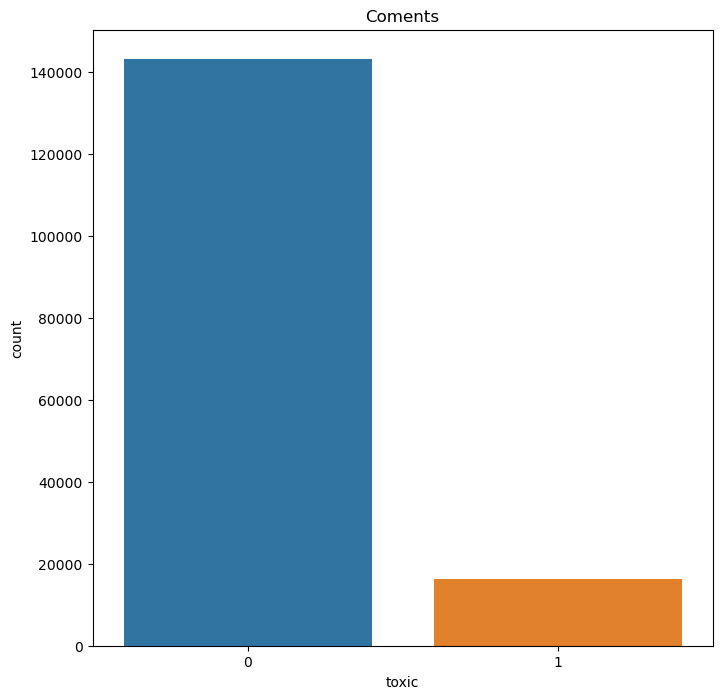

In [13]:
#Получаем график целевого признака
sns.countplot(data=data_one, x='toxic')
plt.title('Coments')
plt.show()

### Вывод

1. Загрузила библиотеки

2. Загрузила данные. Поменяла индекс на колонку "Column:0". 

3. Проверила данные на пропуски и дубликаты - отсутсвют. Есть два типа дпнных "int, object".

4. Получила график целевого признака. Большинство не токсичные коментарии.

### Предоброботка текстовых данных

In [15]:
%%time
#Лемитизируем данные с помощью WordNetLemmatizer()
nltk.download('punkt')
m = WordNetLemmatizer()

def lemmatize(text):
    word_list = nltk.word_tokenize(text)
    lemm_list = [m.lemmatize(w) for w in word_list]
    lemm_text = " ".join(lemm_list)
    return lemm_text

data_one['text'] = data_one['text'].apply(lemmatize)
display(data_one['text'].head(5))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bugagashechka/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    Explanation Why the edits made under my userna...
1    D'aww ! He match this background colour I 'm s...
2    Hey man , I 'm really not trying to edit war ....
3    `` More I ca n't make any real suggestion on i...
4    You , sir , are my hero . Any chance you remem...
Name: text, dtype: object

CPU times: user 42 s, sys: 121 ms, total: 42.1 s
Wall time: 43.8 s


In [16]:
%%time
#Очищаем данные с помощью регулярных выражений 
def new_text(text):
    new_list = re.sub(r'[^a-zA-Z ]', ' ', text)
    new_text = " ".join(new_list.split())
    return new_text

data_one['text'] = data_one['text'].apply(new_text)
display(data_one['text'].head(5))

0    Explanation Why the edits made under my userna...
1    D aww He match this background colour I m seem...
2    Hey man I m really not trying to edit war It s...
3    More I ca n t make any real suggestion on impr...
4    You sir are my hero Any chance you remember wh...
Name: text, dtype: object

CPU times: user 1.03 s, sys: 13.6 ms, total: 1.05 s
Wall time: 1.05 s


In [17]:
#Проверяем на явные дубликаты
print('Явные дубликаты: {}'.format(data_one.duplicated().sum()))
data_one.drop_duplicates(inplace=True)
print('Явные дубликаты: {}'.format(data_one.duplicated().sum()))    

Явные дубликаты: 1147
Явные дубликаты: 0


### Вывод

1. Очистила текст от лишних данных.

2. Лемитизировала данные с помощью WordNetLemmatizer()( Mystem работал очень медленно).

3. Удалила дубликаты

## Обучение

In [19]:
#Создаём корпус из текстов
corpus = data_one['text'].values

In [20]:
%%time
#Разделяем данные на train и test.
features = corpus
target = data_one['toxic']
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=TEST_SIZE,random_state=RANDOM_STATE)

print('X_train {}, X_test {}, y_train {}, y_test {}'.format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train (126516,), X_test (31629,), y_train (126516,), y_test (31629,)
CPU times: user 21.3 ms, sys: 4.14 ms, total: 25.4 ms
Wall time: 23 ms


### Вывод
Создала корпус признков. Разделила на train и test выборки. Расчёт TF-IDF сделаю в пайплайне.
Буду исползовать 3 модели для обучения. По скольку в одном пайплайне обучение идёт очень долго, буду обучать по одному.

1. LogisticRegression

2. DecisionTreeClassifier

3. RandomForestClassifier

### LogisticRegression

In [40]:
%%time
# создаём итоговый пайплайн и параметры.Испльзуем GridSearchCV для поиска лучших параметров
pipe_lr = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                       ('lr', LogisticRegression())])
param_lr = [
              {'lr__solver': ('newton-cg', 'liblinear'),
               'lr__C': range(8,10),
               'lr__random_state': ([42]),
               'lr__max_iter': ([500]),
              'lr__class_weight': (['balanced']),
               'tfidf__min_df': range(1, 3, 1)
               }]



CPU times: user 48 µs, sys: 2 µs, total: 50 µs
Wall time: 54.8 µs


In [41]:
%%time
#Испльзуем GridSearchCV для поиска лучших параметров
grid_lr = GridSearchCV(pipe_lr, param_lr, scoring='f1', cv=3, n_jobs=-1,error_score = 'raise')

grid_lr.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_lr.best_estimator_)
print (f'Метрика лучшей модели на тренировочной выборке:, {round((grid_lr.best_score_),2)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                ('lr',
                 LogisticRegression(C=9, class_weight='balanced', max_iter=500,
                                    random_state=42, solver='newton-cg'))])
Метрика лучшей модели на тренировочной выборке:, 0.76
CPU times: user 4.49 s, sys: 743 ms, total: 5.24 s
Wall time: 20.4 s


In [42]:
#Сохраняем модель в lr_model
best_model_lr = grid_lr.best_estimator_
lr_model = best_model_lr.named_steps['lr']
lr_model

LogisticRegression(C=9, class_weight='balanced', max_iter=500, random_state=42,
                   solver='newton-cg')

In [43]:
#тестирование
predictions_lr = grid_lr.predict(X_test)
lr_test = f1_score(y_test, predictions_lr)
print('F1 тестовых данных {}'.format(round(lr_test,2)))

F1 тестовых данных 0.77
Отчет о классификации               precision    recall  f1-score   support

           0       0.98      0.96      0.97     28401
           1       0.72      0.83      0.77      3228

    accuracy                           0.95     31629
   macro avg       0.85      0.90      0.87     31629
weighted avg       0.95      0.95      0.95     31629



### Вывод

На трен. выборке LogisticRegression с параметрами C=9, class_weight='balanced', random_state=42, solver='newton-cg' метрика f1 получилась 0.76. На тестовых данных 0.77.

### DecisionTreeClassifier 

In [44]:
%%time
# создаём итоговый пайплайн и параметры.Испльзуем GridSearchCV для поиска лучших параметров
pipe_dt = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                       ('dt', DecisionTreeClassifier())])
param_dt = [
              {'dt__random_state': ([42]),
               'dt__max_depth': list(range(1,25)),
               'dt__class_weight': (['balanced']),
               }]



CPU times: user 67 µs, sys: 128 µs, total: 195 µs
Wall time: 199 µs


In [45]:
%%time
#Испльзуем GridSearchCV для поиска лучших параметров
grid_dt = GridSearchCV(pipe_dt, param_dt, scoring='f1', cv=3, n_jobs=-1,error_score = 'raise')

grid_dt.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_dt.best_estimator_)
print (f'Метрика лучшей модели на тренировочной выборке:, {round(grid_dt.best_score_,2)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=24,
                                        random_state=42))])
Метрика лучшей модели на тренировочной выборке:, 0.61
CPU times: user 12.9 s, sys: 1.94 s, total: 14.9 s
Wall time: 1min 24s


In [46]:
#Сохраняем модель в lr_model
best_model_dt = grid_dt.best_estimator_
dt_model = best_model_dt.named_steps['dt']
dt_model

DecisionTreeClassifier(class_weight='balanced', max_depth=24, random_state=42)

In [47]:
#тестирование
predictions_dt = grid_dt.predict(X_test)
dt_test = f1_score(y_test, predictions_dt)
print('F1 тестовых данных {}'.format(round(dt_test,2)))


F1 тестовых данных 0.62
Отчет о классификации               precision    recall  f1-score   support

           0       0.95      0.97      0.96     28401
           1       0.71      0.55      0.62      3228

    accuracy                           0.93     31629
   macro avg       0.83      0.76      0.79     31629
weighted avg       0.93      0.93      0.93     31629



### Вывод

На трен. выборке DecisionTreeClassifier с параметрами class_weight='balanced', max_depth=23, random_state=42 метрика f1 получилась 0.61. На тестовых данных 0.62.

In [48]:
%%time
# создаём итоговый пайплайн и параметры.Испльзуем GridSearchCV для поиска лучших параметров
pipe_lgb = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                       ('lgb', LGBMClassifier())])
param_lgb = [
              {'lgb__random_state': ([42]),
               'lgb__max_depth': [-1],
               'lgb__n_estimators' : [500],
               'lgb__learning_rate':[0.1]}]

CPU times: user 107 µs, sys: 232 µs, total: 339 µs
Wall time: 346 µs


In [49]:
%%time
#Испльзуем GridSearchCV для поиска лучших параметров
grid_lgb = GridSearchCV(pipe_lgb, param_lgb, scoring='f1', cv=3, n_jobs=-1,error_score = 'raise')

grid_lgb.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_lgb.best_estimator_)
print (f'Метрика лучшей модели на тренировочной выборке:, {round(grid_lgb.best_score_,2)}')

[LightGBM] [Info] Number of positive: 12863, number of negative: 113653
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.789151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572315
[LightGBM] [Info] Number of data points in the train set: 126516, number of used features: 11254
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101671 -> initscore=-2.178795
[LightGBM] [Info] Start training from score -2.178795
Лучшая модель и её параметры:

 Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                ('lgb', LGBMClassifier(n_estimators=500, random_state=42))])
Метрика лучшей модели на тренировочной выборке:, 0.77
CPU times: user 2min 46s, sys: 20.8 s, total: 3min 7s
Wall time: 1min 37s


In [50]:
#Сохраняем модель в lr_model
best_model_lgb = grid_lgb.best_estimator_
lgb_model = best_model_lgb.named_steps['lgb']
lgb_model

LGBMClassifier(n_estimators=500, random_state=42)

In [51]:
#тестирование
predictions_lgb = grid_lgb.predict(X_test)
lgb_test = f1_score(y_test, predictions_lgb)
print('F1 тестовых данных {}'.format(round(lgb_test,2)))


F1 тестовых данных 0.78
Отчет о классификации               precision    recall  f1-score   support

           0       0.97      0.99      0.98     28401
           1       0.89      0.70      0.78      3228

    accuracy                           0.96     31629
   macro avg       0.93      0.84      0.88     31629
weighted avg       0.96      0.96      0.96     31629



Вывод
На трен. выборке LGBMClassifier с параметрами n_estimators=500, random_state=42 метрика f1 получилась 0.77. На тестовых данных 0.78.

In [60]:
%%time
# создаём итоговый пайплайн и параметры.Испльзуем GridSearchCV для поиска лучших параметров
pipe_rf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True))
                       ,('rf', RandomForestClassifier(verbose=False))])
param_rf = [
              {'rf__random_state': ([42]),
               'rf__n_estimators': list(range(90,100,150)),
               'rf__class_weight': (['balanced']),
               'rf__criterion': (['entropy']),
               'rf__max_depth': (None, *range(1,10))
               }]

CPU times: user 85 µs, sys: 1 µs, total: 86 µs
Wall time: 101 µs


In [61]:
%%time
#Испльзуем GridSearchCV для поиска лучших параметров
grid_rf = GridSearchCV(pipe_rf, param_rf, scoring='f1', cv=3, n_jobs=-1,error_score = 'raise')

grid_rf.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_rf.best_estimator_)
print (f'Метрика лучшей модели на тренировочной выборке:, {round(grid_rf.best_score_,2)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', n_estimators=90,
                                        random_state=42, verbose=False))])
Метрика лучшей модели на тренировочной выборке:, 0.6516664961333389
CPU times: user 3min 9s, sys: 1.03 s, total: 3min 10s
Wall time: 5min 18s


In [62]:
#Сохраняем модель в lr_model
best_model_rf = grid_rf.best_estimator_
rf_model = best_model_rf.named_steps['rf']
rf_model

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=90, random_state=42, verbose=False)

In [63]:
#тестирование:
predictions_rf = grid_dt.predict(X_test)
dt_test = f1_score(y_test, predictions_rf)
print('F1 тестовых данных {}'.format(round(dt_test,2)))

F1 тестовых данных 0.62


### Вывод

На трен. выборке RandomForestClassifier с параметрами class_weight='balanced', criterion='entropy',n_estimators=90, random_state=42 метрика f1 получилась 0.65. На тестовых данных 0.62.

In [65]:
#Сводная таблица по моделям
index = ['LogisticRegression','DecisionTreeClassifier','LGBMClassifier','RandomForestClassifier']
f1 = {'f1 тренировочных данных':[lr_test,dt_test,lgb_test,dt_test],
     'f1 тестовых данных': [lr_test,dt_test,lgb_test,dt_test]}
f1 = pd.DataFrame(data=f1,index=index)

In [66]:
f1

,f1 тренировочных данных,f1 тестовых данных
LogisticRegression,0.769452,0.769452
DecisionTreeClassifier,0.621546,0.621546
LGBMClassifier,0.782669,0.782669
RandomForestClassifier,0.621546,0.621546


## Выводы

Обучила на трёх моделях.

Результаты:

1. LogisticRegression с параметрами C=9, class_weight='balanced', random_state=42,
   solver='newton-cg' метрика f1 получилась 0.76. На тестовых данных 0.77.

2. DecisionTreeClassifier с параметрами class_weight='balanced', 
   max_depth=23, random_state=42 метрика f1 получилась 0.61. На тестовых данных 0.62. 

3. LGBMClassifier с параметрами n_estimators=500, random_state=42 метрика f1 получилась 0.77. На тестовых данных 0.78.

4. RandomForestClassifier с параметрами class_weight='balanced', criterion='entropy',n_estimators=90, random_state=42 метрика f1 получилась 0.65. На тестовых данных 0.62.

Можно было и улучшить получивший результат поменяв гиперпараметры.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Я не использовала другие гипперпараметры на этих моделях,потому что у меня просто часами работали ячейки.Надеюсь это не критично</font>
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны